In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/online_fraud_with_mfa_enabled.csv')

data.dropna()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,sms alert,MFA enabled,isFraudPrevented
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1,1,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176645,95,CASH_OUT,56745.14,C526144262,56745.14,0.00,C79051264,51433.88,108179.02,1,0,1,0,0
176646,95,TRANSFER,33676.59,C732111322,33676.59,0.00,C1140210295,0.00,0.00,1,0,1,0,0
176647,95,CASH_OUT,33676.59,C1000086512,33676.59,0.00,C1759363094,0.00,33676.59,1,0,1,0,0
176648,95,TRANSFER,87999.25,C927181710,87999.25,0.00,C757947873,0.00,0.00,1,0,1,0,0


In [ ]:
data.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,sms alert,MFA enabled,isFraudPrevented
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,1,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1,1,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176645,95,CASH_OUT,56745.14,C526144262,56745.14,0.00,C79051264,51433.88,108179.02,1,0,1,0,0
176646,95,TRANSFER,33676.59,C732111322,33676.59,0.00,C1140210295,0.00,0.00,1,0,1,0,0
176647,95,CASH_OUT,33676.59,C1000086512,33676.59,0.00,C1759363094,0.00,33676.59,1,0,1,0,0
176648,95,TRANSFER,87999.25,C927181710,87999.25,0.00,C757947873,0.00,0.00,1,0,1,0,0


In [ ]:
data.isna().sum()

step                0
type                0
amount              0
nameOrig            0
oldbalanceOrg       0
newbalanceOrig      0
nameDest            0
oldbalanceDest      0
newbalanceDest      0
isFraud             0
isFlaggedFraud      0
sms alert           0
MFA enabled         0
isFraudPrevented    0
dtype: int64

In [ ]:
data_copy=data.copy()
data_copy=data_copy.drop('isFlaggedFraud',axis=1)
data_copy=data_copy.drop('sms alert',axis=1)
data_copy.corr()

<ipython-input-4-b59178e2b247>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_copy.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,MFA enabled,isFraudPrevented
step,1.000000,0.206932,0.010748,-0.017480,-0.002440,0.001944,0.725528,-0.725528,-0.725528
amount,0.206932,1.000000,0.010015,-0.024437,0.195245,0.320204,0.215271,-0.215271,-0.215271
oldbalanceOrg,0.010748,0.010015,1.000000,0.996872,0.097758,0.068217,0.008966,-0.008966,-0.008966
newbalanceOrig,-0.017480,-0.024437,0.996872,1.000000,0.099910,0.065764,-0.024781,0.024781,0.024781
oldbalanceDest,-0.002440,0.195245,0.097758,0.099910,1.000000,0.948365,-0.015984,0.015984,0.015984
newbalanceDest,0.001944,0.320204,0.068217,0.065764,0.948365,1.000000,-0.003273,0.003273,0.003273
isFraud,0.725528,0.215271,0.008966,-0.024781,-0.015984,-0.003273,1.000000,-1.000000,-1.000000
MFA enabled,-0.725528,-0.215271,-0.008966,0.024781,0.015984,0.003273,-1.000000,1.000000,1.000000
isFraudPrevented,-0.725528,-0.215271,-0.008966,0.024781,0.015984,0.003273,-1.000000,1.000000,1.000000


<ipython-input-5-627dda80fd3e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_copy.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


<Axes: >

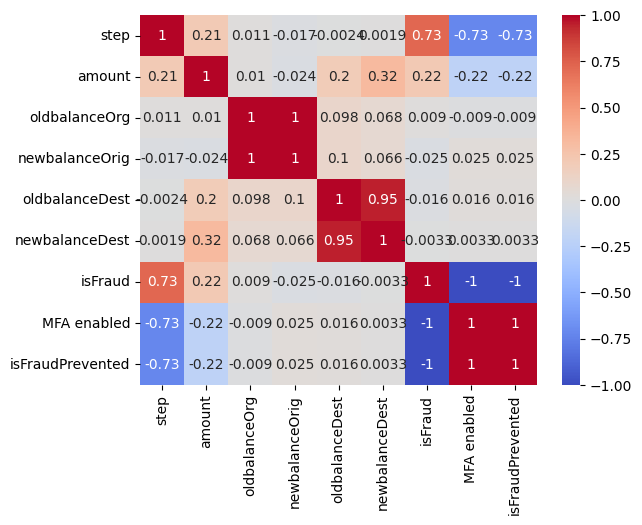

In [ ]:
import seaborn as sns
sns.heatmap(data_copy.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, mean_squared_error

X = data[['type','amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','sms alert','MFA enabled','isFraudPrevented']]
y = data[['isFraud']]
y = np.squeeze(y)

X = pd.get_dummies(data=X, prefix='type')

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.70, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Create the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Evaluate the model
scores = model.evaluate(X_valid, y_valid)
print("\nAccuracy: %.2f%%" % (scores[1]*100))


Epoch 1/10
3092/3092 [==============================] - 13s 4ms/step - loss: 1.9521 - accuracy: 0.9938 - val_loss: 0.9115 - val_accuracy: 0.9943
Epoch 2/10
3092/3092 [==============================] - 14s 4ms/step - loss: 2.7430 - accuracy: 0.9926 - val_loss: 0.1913 - val_accuracy: 0.9923
Epoch 3/10
3092/3092 [==============================] - 13s 4ms/step - loss: 1.0754 - accuracy: 0.9932 - val_loss: 0.2072 - val_accuracy: 0.9932
Epoch 4/10
3092/3092 [==============================] - 13s 4ms/step - loss: 0.6647 - accuracy: 0.9933 - val_loss: 0.1341 - val_accuracy: 0.9932
Epoch 5/10
3092/3092 [==============================] - 13s 4ms/step - loss: 0.3432 - accuracy: 0.9934 - val_loss: 0.0381 - val_accuracy: 0.9932
Epoch 6/10
3092/3092 [==============================] - 14s 4ms/step - loss: 0.0881 - accuracy: 0.9934 - val_loss: 0.0381 - val_accuracy: 0.9932
Epoch 7/10
3092/3092 [==============================] - 13s 4ms/step - loss: 0.0443 - accuracy: 0.9934 - val_loss: 0.0384 - val_ac

In [ ]:
print(scores)

[0.07900623977184296, 0.9938108325004578]


In [ ]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train.ravel())

# ROS
ros = RandomOverSampler()

# fit and apply the random oversampling
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)
#print(X_resampled_ros)

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from collections import Counter

smoteEnn = SMOTEENN(random_state=42)
X_resampled_1, y_resampled_1 = smoteEnn.fit_resample(X_train, y_train)

print("SMOTEENN class distribution:", Counter(y_resampled_1))

# Apply smote_enn pipeline
smote = SMOTE()
enn = EditedNearestNeighbours()
smote_enn = Pipeline([('smote', smote), ('enn', enn)])
X_resampled_2, y_resampled_2 = smote_enn.fit_resample(X_train, y_train)

print("smote_enn class distribution:", Counter(y_resampled_2))
print("smote_enn class distribution:", Counter(X_resampled_2))


SMOTEENN class distribution: Counter({1: 122066, 0: 120121})
smote_enn class distribution: Counter({0: 122840, 1: 122153})
smote_enn class distribution: Counter({'amount': 1, 'oldbalanceOrg': 1, 'newbalanceOrig': 1, 'oldbalanceDest': 1, 'newbalanceDest': 1, 'sms alert': 1, 'MFA enabled': 1, 'isFraudPrevented': 1, 'type_CASH_IN': 1, 'type_CASH_OUT': 1, 'type_DEBIT': 1, 'type_PAYMENT': 1, 'type_TRANSFER': 1})


In [ ]:
print(X_train.shape)
print(y_train.shape)

#SMOTE data
print(X_resampled.shape)
print(y_resampled.shape)

# ROS Data
print(X_resampled_ros.shape)
print(y_resampled_ros.shape)

(123654, 13)
(123654,)
(245680, 13)
(245680,)
(245680, 13)
(245680,)


In [ ]:
# smoteENN data
print(X_resampled_1.shape)
print(y_resampled_1.shape)

# smote_enn data
print(X_resampled_2.shape)
print(y_resampled_2.shape)


(242187, 13)
(242187,)
(244981, 13)
(244981,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#X_train, X_test, y_train, y_test = train_test_split(data, data['isFraud'], test_size=0.2, random_state=42)
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.70, random_state=1)

# Define individual models
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = GaussianNB()
model4 = SVC()
model5 = RandomForestClassifier()
model6 = MLPClassifier()
model7 = LogisticRegression(random_state=42)
model8 = GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

In [ ]:
log_model = model7.fit(X_train, y_train)
log_model_pred = model7.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(log_model_pred, y_valid))

[[52527    37]
 [  141   291]]


In [ ]:
print(metrics.f1_score(log_model_pred, y_valid))
print(metrics.accuracy_score(log_model_pred, y_valid))
print(metrics.precision_score(log_model_pred, y_valid))

0.7657894736842106
0.9966412559438448
0.8871951219512195


In [ ]:
log_model_smoteEnn = model7.fit(X_resampled_1, y_resampled_1)
log_model_smoteENN_pred = model7.predict(X_valid)

In [ ]:
print(metrics.f1_score(log_model_smoteENN_pred, y_valid))
print(metrics.accuracy_score(log_model_smoteENN_pred, y_valid))
print(metrics.precision_score(log_model_smoteENN_pred, y_valid))

0.13207941483803554
0.9216355951392557
0.9634146341463414


In [ ]:
log_model_ros = model7.fit(X_resampled_ros, y_resampled_ros)
log_model_ros_pred = model7.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(log_model_ros_pred, y_valid))
print(metrics.f1_score(log_model_ros_pred, y_valid))
print(metrics.accuracy_score(log_model_ros_pred, y_valid))
print(metrics.precision_score(log_model_ros_pred, y_valid))

[[48216    12]
 [ 4452   316]]
0.1240188383045526
0.9157672277152993
0.9634146341463414


In [ ]:
GBM = model8.fit(X_train, y_train)
GBM_pred = model8.predict(X_valid)

print(metrics.confusion_matrix(GBM_pred, y_valid))
print(metrics.f1_score(GBM_pred, y_valid))
print(metrics.accuracy_score(GBM_pred, y_valid))
print(metrics.precision_score(GBM_pred, y_valid))

[[52668     0]
 [    0   328]]
1.0
1.0
1.0


In [ ]:
GBM_smoteENN = model8.fit(X_resampled_1, y_resampled_1)
GBM_smoteENN_pred = model8.predict(X_valid)

print(metrics.confusion_matrix(GBM_smoteENN_pred, y_valid))
print(metrics.f1_score(GBM_smoteENN_pred, y_valid))
print(metrics.accuracy_score(GBM_smoteENN_pred, y_valid))
print(metrics.precision_score(GBM_smoteENN_pred, y_valid))

[[52668     0]
 [    0   328]]
1.0
1.0
1.0


In [ ]:
GBM_SMOTE = model8.fit(X_resampled, y_resampled)
GBM_SMOTE_pred = model8.predict(X_valid)

print(metrics.confusion_matrix(GBM_SMOTE_pred, y_valid))
print(metrics.f1_score(GBM_SMOTE_pred, y_valid))
print(metrics.accuracy_score(GBM_SMOTE_pred, y_valid))
print(metrics.precision_score(GBM_SMOTE_pred, y_valid))

[[52668     0]
 [    0   328]]
1.0
1.0
1.0


In [ ]:
# KNN
knn_model_fit = model2.fit(X_train, y_train)

In [ ]:
knn_pred = model2.predict(X_valid)

In [ ]:
knn_conf_Mat = metrics.confusion_matrix(y_valid, knn_pred)
print(knn_conf_Mat)

[[52612    56]
 [  116   212]]


In [ ]:
print(metrics.accuracy_score(y_valid, knn_pred))
print(metrics.f1_score(y_valid, knn_pred))

0.9967544720356253
0.7114093959731543


In [ ]:
knn_cv_results = cross_val_score(model2, X, y, cv=kf, scoring='accuracy')
knn_cv_results

array([0.99677328, 0.99654684, 0.99634871, 0.99609397, 0.99615058])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (knn_cv_results.mean(), knn_cv_results.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [ ]:
# KNN with ROS data
knn_ros = model2.fit(X_resampled_ros, y_resampled_ros)

In [ ]:
knn_ros_pred = model2.predict(X_valid)
knn_ros_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("CFM:",metrics.confusion_matrix(y_valid, knn_ros_pred))
print("ACC:",metrics.accuracy_score(y_valid, knn_ros_pred))
print("F1:",metrics.f1_score(y_valid, knn_ros_pred))

CFM: [[52313   355]
 [   69   259]]
ACC: 0.9919993961808439
F1: 0.5498938428874736


In [ ]:
knn_ros_cv_results = cross_val_score(model2, X, y, cv=kf, scoring='accuracy')
knn_ros_cv_results

array([0.99677328, 0.99654684, 0.99634871, 0.99609397, 0.99615058])

In [ ]:

# Print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (knn_ros_cv_results.mean(), knn_ros_cv_results.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [ ]:
# knn with SMOTEENN
knn_smoteENN = model2.fit(X_resampled_1, y_resampled_1)

In [ ]:
knn_smoteENN_pred = model2.predict(X_valid)
knn_smoteENN_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("CM OF KNN WITH SMOTEENN: ")
print(metrics.confusion_matrix(knn_smoteENN_pred, y_valid))
print(metrics.accuracy_score(knn_smoteENN_pred, y_valid))
print(metrics.f1_score(knn_smoteENN_pred, y_valid))

CM OF KNN WITH SMOTEENN: 
[[51450    32]
 [ 1218   296]]
0.9764133142123934
0.3213897937024973


In [ ]:
knn_smote_enn = model2.fit(X_resampled_2, y_resampled_2)

In [ ]:
knn_smote_enn_pred = model2.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, knn_smote_enn_pred))
print(metrics.accuracy_score(y_valid, knn_smote_enn_pred))
print(metrics.f1_score(y_valid, knn_smote_enn_pred))

[[51763   905]
 [   40   288]]
0.9821684655445694
0.378698224852071


In [ ]:
# Naive bayes

nb_fit = model3.fit(X_train,y_train)

In [ ]:
nb_pred = model3.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, nb_pred))
print(metrics.accuracy_score(y_valid, nb_pred))
print(metrics.f1_score(y_valid, nb_pred))

[[51569  1099]
 [  237    91]]
0.974790550230206
0.11989459815546774


In [ ]:
# NB with ROS
nb_ros = model3.fit(X_resampled_ros, y_resampled_ros)

In [ ]:
nb_ros_pred = model3.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, nb_ros_pred))
print(metrics.accuracy_score(y_valid, nb_ros_pred))
print(metrics.f1_score(y_valid, nb_ros_pred))

[[11669 40999]
 [    7   321]]
0.2262434900747226
0.01541490587783327


In [ ]:
nb_smoteENN = model3.fit(X_resampled_1, y_resampled_1)

In [ ]:
nb_smoteENN_pred = model3.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, nb_smoteENN_pred))
print(metrics.accuracy_score(y_valid, nb_smoteENN_pred))
print(metrics.f1_score(y_valid, nb_smoteENN_pred))
# PERFORMANCE DECREASE WITH SMOTE, SMOT-ENN, SMOTE_ENN

[[11719 40949]
 [    7   321]]
0.2271869575062269
0.015433434299725948


In [ ]:
nb_smote_ENN = model3.fit(X_resampled_2, y_resampled_2)

In [ ]:
nb_smote_enn_pred = model3.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, nb_smote_enn_pred))
print(metrics.accuracy_score(y_valid, nb_smote_enn_pred))
print(metrics.f1_score(y_valid, nb_smote_enn_pred))
# PERFORMANCE DECREASE WITH SMOTE, SMOT-ENN, SMOTE_ENN

[[11766 40902]
 [    7   321]]
0.2280738168918409
0.015450891675290608


In [ ]:
# SVM MODEL
svm_fit = model4.fit(X_train, y_train)

In [ ]:
svm_pred = model4.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, svm_pred))
print(metrics.accuracy_score(y_valid, svm_pred))
print(metrics.f1_score(y_valid, svm_pred))

[[52665     3]
 [  247    81]]
0.9952826628424787
0.3932038834951456


In [ ]:
# SVM WITH SMOTE-ENN
svm_smoteENN = model4.fit(X_resampled_1, y_resampled_1)

In [ ]:
svm_smoteENN_pred = model4.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, svm_smoteENN_pred))
print(metrics.accuracy_score(y_valid, svm_smoteENN_pred))
print(metrics.f1_score(y_valid, svm_smoteENN_pred))
#low f1-score for SMOTE and SMOTE-ENN

[[51061  1607]
 [   66   262]]
0.9684315797418673
0.23850705507510242


In [ ]:
# SVM WITH smote_enn
svm_smote_enn = model4.fit(X_resampled_2, y_resampled_2)

In [ ]:
svm_smote_enn_pred = model4.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, svm_smote_enn_pred))
print(metrics.accuracy_score(y_valid, svm_smote_enn_pred))
print(metrics.f1_score(y_valid, svm_smote_enn_pred))
#low f1-score for SMOTE and SMOTE-ENN

[[51174  1494]
 [   68   260]]
0.9705260774398068
0.24975984630163303


In [ ]:
# Random Forest model

rf_fit = model5.fit(X_train, y_train)

In [ ]:
rf_predict = model5.predict(X_valid)

In [ ]:
rf_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(metrics.confusion_matrix(y_valid, rf_predict))
print(metrics.accuracy_score(y_valid, rf_predict))
print(metrics.f1_score(y_valid, rf_predict))

[[52668     0]
 [    0   328]]
1.0
1.0


In [ ]:
rf_cv_results = cross_val_score(model5, X, y, cv=kf, scoring='accuracy')
rf_cv_results

array([1., 1., 1., 1., 1.])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (rf_cv_results.mean(), rf_cv_results.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [ ]:
rf_smote = model5.fit(X_resampled, y_resampled)

In [ ]:
rf_smote_pred = model5.predict(X_valid)
rf_smote_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(metrics.confusion_matrix(y_valid, rf_smote_pred))
print(metrics.f1_score(y_valid, rf_smote_pred))
print(metrics.accuracy_score(y_valid, rf_smote_pred))

[[52668     0]
 [    0   328]]
1.0
1.0


In [ ]:
# print(X_resampled_ros)

# DT with ROS
rf_ros = model5.fit(X_resampled_ros, y_resampled_ros)

In [ ]:
rf_ros_pred = model5.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, rf_ros_pred))
print(metrics.f1_score(y_valid, rf_ros_pred))
print(metrics.accuracy_score(y_valid, rf_ros_pred))

[[52668     0]
 [    0   328]]
1.0
1.0


In [ ]:
rf_smoteENN = model5.fit(X_resampled_1, y_resampled_1)

In [ ]:
rf_smoteENN_pred = model5.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, rf_smoteENN_pred))
print(metrics.f1_score(y_valid, rf_smoteENN_pred))
print(metrics.accuracy_score(y_valid, rf_smoteENN_pred))

[[52668     0]
 [    0   328]]
1.0
1.0


In [ ]:
rf_smote_enn = model5.fit(X_resampled_2, y_resampled_2)

In [ ]:
rf_smote_enn_pred = model5.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, rf_smote_enn_pred))
print(metrics.f1_score(y_valid, rf_smote_enn_pred))
print(metrics.accuracy_score(y_valid, rf_smote_enn_pred))

[[52668     0]
 [    0   328]]
1.0
1.0


In [ ]:
# isolation_forest for anomaly detection
from sklearn.ensemble import IsolationForest

In [ ]:
isol_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, random_state=42)

# Fit the model to the data
isol_forest.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [ ]:
isol_forest_pred = isol_forest.predict(X_valid)
print(metrics.confusion_matrix(y_valid, isol_forest_pred))

[[    0     0     0]
 [ 4939     0 47729]
 [  328     0     0]]


In [ ]:
scores = isol_forest.decision_function(X)
scores

array([ 0.14567442,  0.15628851, -0.12862595, ..., -0.05848884,
       -0.13558516, -0.05082575])

In [ ]:
for i, score in enumerate(scores):
    if score < -0.5: # threshold for classifying as an anomaly
        print("Data point", i, "is an anomaly with score", score)

In [ ]:
# Define the ensemble model
ensemble = VotingClassifier(estimators=[('rf', model5),('dt', model1), ('knn', model2), ('nb', model3),
                                        ('svm', model4)], voting='hard')

ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('nb', GaussianNB()), ('svm', SVC())])

In [ ]:
# Predict on test set
ensemble_pred = ensemble.predict(X_valid)

In [ ]:
ensemble_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
actual_ensemble = y_valid
predicted_ensemble=ensemble_pred

from sklearn import metrics
confusion_matrix_ensemble = metrics.confusion_matrix(actual_ensemble, predicted_ensemble)
print(confusion_matrix_ensemble)
Accuracy_ensemble = metrics.accuracy_score(actual_ensemble, predicted_ensemble)
Accuracy_ensemble

[[52665     3]
 [  108   220]]


0.9979055023020605

In [ ]:
Precision_ensemble = metrics.precision_score(actual_ensemble, predicted_ensemble)
Precision_ensemble

0.9865470852017937

In [ ]:
Sensitivity_recall_ensemble = metrics.recall_score(actual_ensemble, predicted_ensemble)
Sensitivity_recall_ensemble

0.6707317073170732

In [ ]:
Specificity_ensemble = metrics.recall_score(actual_ensemble, predicted_ensemble, pos_label=0)
Specificity_ensemble

0.9999430394167236

In [ ]:
F1_score_ensemble = metrics.f1_score(actual_ensemble, predicted_ensemble)

In [ ]:
F1_score_ensemble

0.7985480943738658

In [ ]:
ensemble_cv_score = cross_val_score(ensemble, X, y, cv=kf, scoring='accuracy')
ensemble_cv_score
#7 min to execute

array([0.99784885, 0.99765072, 0.99742429, 0.99731107, 0.9975092 ])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (ensemble_cv_score.mean(), ensemble_cv_score.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [ ]:
# ABOVE ENSEMBLE WITH SMOTE-ENN
ensemble_smoteENN = ensemble.fit(X_resampled_1, y_resampled_1) # 22min to run

In [ ]:
ensemble_smoteENN_pred = ensemble.predict(X_valid)
ensemble_smoteENN_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble_smoteENN_pred))
print(metrics.accuracy_score(y_valid, ensemble_smoteENN_pred))
# decrease in f1_score
print(metrics.f1_score(y_valid, ensemble_smoteENN_pred))
print(metrics.precision_score(y_valid, ensemble_smoteENN_pred))
print(metrics.recall_score(y_valid, ensemble_smoteENN_pred))
print(metrics.recall_score(y_valid, ensemble_smoteENN_pred, pos_label=0))

[[52296   372]
 [    2   326]]
0.9929428636123481
0.6354775828460039
0.4670487106017192
0.9939024390243902
0.9929368876737298


In [ ]:
# ABOVE ENSEMBLE WITH SMOTE_ENN
ensemble_smote_enn = ensemble.fit(X_resampled_2, y_resampled_2)

In [ ]:
ensemble_smote_enn_pred = ensemble.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble_smote_enn_pred))
print(metrics.accuracy_score(y_valid, ensemble_smote_enn_pred))
# decrease in f1_score
print(metrics.f1_score(y_valid, ensemble_smote_enn_pred))
print(metrics.precision_score(y_valid, ensemble_smote_enn_pred))
print(metrics.recall_score(y_valid, ensemble_smote_enn_pred))
print(metrics.recall_score(y_valid, ensemble_smote_enn_pred, pos_label=0))

[[52376   292]
 [    1   327]]
0.994471280851385
0.6906019007391763
0.5282714054927302
0.9969512195121951
0.9944558365610997


In [ ]:
# ABOVE ENSEMBLE WITH SMOTE_ENN
ensemble_smote = ensemble.fit(X_resampled, y_resampled)

In [ ]:
ensemble_smote_pred = ensemble.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble_smote_pred))
print(metrics.accuracy_score(y_valid, ensemble_smote_pred))
print(metrics.f1_score(y_valid, ensemble_smote_pred))
print(metrics.precision_score(y_valid, ensemble_smote_pred))
print(metrics.recall_score(y_valid, ensemble_smote_pred))
print(metrics.recall_score(y_valid, ensemble_smote_pred, pos_label=0))

[[52372   296]
 [    1   327]]
0.9943958034568646
0.6876971608832808
0.5248796147672552
0.9969512195121951
0.9943798891167313


In [ ]:
# MLP classifier
#model6 = MLPClassifier()
mlp_fit = model6.fit(X_train, y_train)

In [ ]:
mlp_pred = model6.predict(X_valid)

In [ ]:
mlp_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
mlp_conf_mat = metrics.confusion_matrix(y_valid, mlp_pred)
print(mlp_conf_mat)

[[51971   697]
 [   30   298]]


In [ ]:
print("The accuracy of MLP model is :", metrics.accuracy_score(y_valid, mlp_pred))
print("The f1-score of MLP model is :", metrics.f1_score(y_valid, mlp_pred))

The accuracy of MLP model is : 0.986281983545928
The f1-score of MLP model is : 0.45049130763416473


In [ ]:
# MLP WITH SMOTE_ENN
mlp_smoteENN = model6.fit(X_resampled_1, y_resampled_1)

In [ ]:
mlp_smoteENN_pred = model6.predict(X_valid)
mlp_smoteENN_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Confusion matrix", metrics.confusion_matrix(y_valid, mlp_smoteENN_pred))
print("The accuracy of MLP model with SMOTE-ENN is :", metrics.accuracy_score(y_valid, mlp_smoteENN_pred))
print("The f1-score of MLP model with SMOTE-ENN is :", metrics.f1_score(y_valid, mlp_smoteENN_pred))
# decrease in F1-score

Confusion matrix [[31474 21194]
 [    1   327]]
The accuracy of MLP model with SMOTE-ENN is : 0.6000641557853423
The f1-score of MLP model with SMOTE-ENN is : 0.029932720032953452


In [ ]:
# MLP WITH smote_enn
mlp_smote_enn = model6.fit(X_resampled_2, y_resampled_2)

In [ ]:
mlp_smote_enn_pred = model6.predict(X_valid)
mlp_smote_enn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Confusion matrix", metrics.confusion_matrix(y_valid,mlp_smote_enn_pred))
print("The accuracy of MLP model with SMOTE-ENN is :", metrics.accuracy_score(y_valid, mlp_smote_enn_pred))
print("The f1-score of MLP model with SMOTE-ENN is :", metrics.f1_score(y_valid, mlp_smote_enn_pred))
# decrease in F1-score

Confusion matrix [[51544  1124]
 [   11   317]]
The accuracy of MLP model with SMOTE-ENN is : 0.9785832893048532
The f1-score of MLP model with SMOTE-ENN is : 0.35839457320520063


In [ ]:
mlp_cv_results = cross_val_score(model6, X, y, cv=kf, scoring='accuracy')
mlp_cv_results

array([0.99515992, 0.94548542, 0.98366827, 0.96600623, 0.97512029])

In [ ]:

# Print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (mlp_cv_results.mean(), mlp_cv_results.std() * 2))

Accuracy: 0.97 (+/- 0.03)


In [ ]:
#ensemle using MLP, RF, DT, NB,SVM,KNN
ensemble1 = VotingClassifier(estimators=[('MLP',model6),('RF',model5),('DT',model1),('NB',model3),('SVM',model4),('KNN',model2)], voting='hard')

ensemble1.fit(X_train, y_train)

VotingClassifier(estimators=[('MLP', MLPClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('NB', GaussianNB()), ('SVM', SVC()),
                             ('KNN', KNeighborsClassifier())])

In [ ]:
ensemble1_predict = ensemble1.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble1_predict))

[[52668     0]
 [  131   197]]


In [ ]:
print(metrics.f1_score(y_valid, ensemble1_predict))

0.7504761904761904


In [ ]:
print(metrics.accuracy_score(y_valid, ensemble1_predict))

0.9975281153294588


In [ ]:
# ENSEMBLE1 with SMOTE-ENN
# 26min
ensemble1_smoteENN =  ensemble1.fit(X_resampled_1, y_resampled_1)

In [ ]:
ensemble1_smoteENN_pred = ensemble1.predict(X_valid)


In [ ]:
print("",metrics.confusion_matrix(y_valid, ensemble1_smoteENN_pred))
print("",metrics.accuracy_score(y_valid, ensemble1_smoteENN_pred))
print("",metrics.f1_score(y_valid, ensemble1_smoteENN_pred)) # IMPROVED F1_score

 [[52621    47]
 [   16   312]]
 0.9988112310363046
 0.908296943231441


In [ ]:
# # ENSEMBLE1 with smote_enn
ensemble1 = VotingClassifier(estimators=[('MLP',model6),('RF',model5),('DT',model1),('NB',model3),('SVM',model4),('KNN',model2)], voting='hard')
ensemble1_smote_enn =  ensemble1.fit(X_resampled_2, y_resampled_2)

In [ ]:
ensemble1_smote_enn_pred = ensemble1.predict(X_valid)

In [ ]:
print("",metrics.confusion_matrix(y_valid, ensemble1_smote_enn_pred))
print("",metrics.accuracy_score(y_valid, ensemble1_smote_enn_pred))
print("",metrics.f1_score(y_valid, ensemble1_smote_enn_pred)) # IMPROVED F1_score

 [[52621    47]
 [   15   313]]
 0.9988301003849347
 0.9098837209302326


In [ ]:
ensemble1_smote = ensemble1.fit(X_resampled, y_resampled)

In [ ]:
ensemble1_smote_pred = ensemble1.predict(X_valid)

In [ ]:
print("",metrics.confusion_matrix(y_valid, ensemble1_smote_pred))
print("",metrics.accuracy_score(y_valid, ensemble1_smote_pred))
print("",metrics.f1_score(y_valid, ensemble1_smote_pred)) # IMPROVED F1_score

 [[52658    10]
 [   20   308]]
 0.9994339195410974
 0.9535603715170279


In [ ]:
ensemble1_cv_results = cross_val_score(ensemble1, X,y, scoring="accuracy")
ensemble1_cv_results

array([0.99606567, 0.99739598, 0.99793377, 0.99807529, 0.99569771])

In [ ]:
print("Accuracy and std is :", (ensemble1_cv_results.mean(), ensemble1_cv_results.std() * 2))

Accuracy and std is : (0.99703368242287, 0.0019489984429712582)


In [ ]:
print(kf.split(X))

<generator object _BaseKFold.split at 0x7fe75bba77b0>


In [ ]:
# ENSEMBLE2 using DT, RF, SVM, KNN
ensemble2 = VotingClassifier(estimators=[#('MLP',model6),
                                         ('RF',model5),('DT',model1),#('NB',model3),
                                         ('SVM',model4),
                                         ('KNN',model2)], voting='hard')

ensemble2.fit(X_train, y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('DT', DecisionTreeClassifier()), ('SVM', SVC()),
                             ('KNN', KNeighborsClassifier())])

In [ ]:
ensemble2_test = ensemble2.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble2_test))
print(metrics.accuracy_score(y_valid, ensemble2_test))
print(metrics.precision_score(y_valid, ensemble2_test))
print(metrics.recall_score(y_valid, ensemble2_test))
print(metrics.f1_score(y_valid, ensemble2_test))

[[52668     0]
 [  116   212]]
0.9978111555589101
1.0
0.6463414634146342
0.7851851851851851


In [ ]:
# ENSEMBLE2 with SMOTE-ENN
ensemble2_smoteENN = ensemble2.fit(X_resampled_1, y_resampled_1)

In [ ]:
ensemble2_smoteENN_pred = ensemble2.predict(X_valid)

In [ ]:
print("CFM")
print(metrics.confusion_matrix(y_valid, ensemble2_smoteENN_pred))
print(metrics.accuracy_score(y_valid, ensemble2_smoteENN_pred))
print(metrics.precision_score(y_valid, ensemble2_smoteENN_pred))
print(metrics.recall_score(y_valid, ensemble2_smoteENN_pred))
print(metrics.f1_score(y_valid, ensemble2_smoteENN_pred))
#IMPROVED F1-SCORE

CFM
[[52668     0]
 [   16   312]]
0.9996980904219186
1.0
0.9512195121951219
0.975


In [ ]:
# ENSEMBLE2 with SMOTE_ENN
# ensemble2 = VotingClassifier(estimators=[#('MLP',model6),
#                                          ('RF',model5),('DT',model1),#('NB',model3),
#                                          ('SVM',model4),
#                                          ('KNN',model2)], voting='hard')
ensemble2_smote_ENN = ensemble2.fit(X_resampled_2, y_resampled_2)

In [ ]:
ensemble2_smote_ENN_pred = ensemble2.predict(X_valid)

In [ ]:
print("CFM")
print(metrics.confusion_matrix(y_valid, ensemble2_smote_ENN_pred))
print(metrics.accuracy_score(y_valid, ensemble2_smote_ENN_pred))
print(metrics.precision_score(y_valid, ensemble2_smote_ENN_pred))
print(metrics.recall_score(y_valid, ensemble2_smote_ENN_pred))
print(metrics.f1_score(y_valid, ensemble2_smote_ENN_pred))
#IMPROVED f1-score as normal model without SMOTE

CFM
[[52668     0]
 [   17   311]]
0.9996792210732885
1.0
0.948170731707317
0.97339593114241


In [ ]:
# ENSEMBLE2 with SMOTE data
ensemble2_smote = ensemble2.fit(X_resampled, y_resampled)

In [ ]:
ensemble2_smote_pred = ensemble2.predict(X_valid)

In [ ]:
print("CFM")
print(metrics.confusion_matrix(y_valid, ensemble2_smote_pred))
print(metrics.accuracy_score(y_valid, ensemble2_smote_pred))
print(metrics.precision_score(y_valid, ensemble2_smote_pred))
print(metrics.recall_score(y_valid, ensemble2_smote_pred))
print(metrics.f1_score(y_valid, ensemble2_smote_pred))
#same f1-score as normal model without SMOTE

CFM
[[52668     0]
 [  116   212]]
0.9978111555589101
1.0
0.6463414634146342
0.7851851851851851


In [ ]:
ensemble2_cv_result = cross_val_score(ensemble2, X,y, scoring="accuracy")
ensemble2_cv_result

array([0.99620719, 0.99731107, 0.99790546, 0.99807529, 0.99790546])

In [ ]:
print("Accuracy and STD is :", (ensemble2_cv_result.mean(), ensemble2_cv_result.std() * 2))

Accuracy and STD is : (0.9974808944240022, 0.001375496636149474)


In [ ]:
# ENSEMBLE 3 with MLP, RF, DT, KNN
ensemble3 = VotingClassifier(estimators=[('MLP',model6),
                                         ('RF',model5),('DT',model1),#('NB',model3),
                                         #('SVM',model4),
                                         ('KNN',model2)], voting='hard')

ensemble3.fit(X_train, y_train)

VotingClassifier(estimators=[('MLP', MLPClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier())])

In [ ]:
ensemble3_test = ensemble3.predict(X_valid)

In [ ]:
print("CFM:,",metrics.confusion_matrix(y_valid, ensemble3_test))
print("ACC:",metrics.accuracy_score(y_valid, ensemble3_test))
print("PREC",metrics.precision_score(y_valid, ensemble3_test))
print("REC",metrics.recall_score(y_valid, ensemble3_test))
print("specificity:",metrics.recall_score(y_valid, ensemble3_test,pos_label=0))
print("F1:",metrics.f1_score(y_valid, ensemble3_test))

CFM:, [[52668     0]
 [   78   250]]
ACC: 0.9985281908068534
PREC 1.0
REC 0.7621951219512195
specificity: 1.0
F1: 0.8650519031141869


In [ ]:
ensemble3_smoteENN = ensemble3.fit(X_resampled_1, y_resampled_1)

In [ ]:
ensemble3_smoteENN_pred = ensemble3.predict(X_valid)

In [ ]:
print("CFM:,",metrics.confusion_matrix(y_valid, ensemble3_smoteENN_pred))
print("ACC:",metrics.accuracy_score(y_valid, ensemble3_smoteENN_pred))
print("PREC",metrics.precision_score(y_valid, ensemble3_smoteENN_pred))
print("REC",metrics.recall_score(y_valid, ensemble3_smoteENN_pred))
print("specificity:",metrics.recall_score(y_valid, ensemble3_smoteENN_pred,pos_label=0))
print("F1:",metrics.f1_score(y_valid, ensemble3_smoteENN_pred))
# IMPROVED F1-SCORE to 0.99

CFM:, [[52668     0]
 [    5   323]]
ACC: 0.9999056532568495
PREC 1.0
REC 0.9847560975609756
specificity: 1.0
F1: 0.9923195084485407


In [ ]:
# above ensemble WITH SMOTE_ENN
# ensemble3 = VotingClassifier(estimators=[('MLP',model6),
#                                          ('RF',model5),('DT',model1),#('NB',model3),
#                                          #('SVM',model4),
#                                          ('KNN',model2)], voting='hard')

ensemble3_smote_ENN = ensemble3.fit(X_resampled_2, y_resampled_2)

In [ ]:
ensemble3_smote_ENN_pred = ensemble3.predict(X_valid)

In [ ]:
print("CFM:,",metrics.confusion_matrix(y_valid, ensemble3_smote_ENN_pred))
print("ACC:",metrics.accuracy_score(y_valid, ensemble3_smote_ENN_pred))
print("PREC",metrics.precision_score(y_valid, ensemble3_smote_ENN_pred))
print("REC",metrics.recall_score(y_valid, ensemble3_smote_ENN_pred))
print("specificity:",metrics.recall_score(y_valid, ensemble3_smote_ENN_pred,pos_label=0))
print("F1:",metrics.f1_score(y_valid, ensemble3_smote_ENN_pred))
# IMPROVED F1-SCORE TO 0.947 FROM 0.86

CFM:, [[52668     0]
 [   33   295]]
ACC: 0.9993773114952071
PREC 1.0
REC 0.899390243902439
specificity: 1.0
F1: 0.9470304975922954


In [ ]:
ensemble3_smote = ensemble3.fit(X_resampled, y_resampled)

In [ ]:
ensemble3_smote_pred = ensemble3.predict(X_valid)

In [ ]:
print("CFM:,",metrics.confusion_matrix(y_valid, ensemble3_smote_pred))
print("ACC:",metrics.accuracy_score(y_valid, ensemble3_smote_pred))
print("PREC",metrics.precision_score(y_valid, ensemble3_smote_pred))
print("REC",metrics.recall_score(y_valid, ensemble3_smote_pred))
print("specificity:",metrics.recall_score(y_valid, ensemble3_smote_pred,pos_label=0))
print("F1:",metrics.f1_score(y_valid, ensemble3_smote_pred))

CFM:, [[52668     0]
 [   33   295]]
ACC: 0.9993773114952071
PREC 1.0
REC 0.899390243902439
specificity: 1.0
F1: 0.9470304975922954


In [ ]:
ensemble3_cv_result = cross_val_score(ensemble3, X_valid,y_valid, scoring="accuracy")
ensemble3_cv_result

array([0.99801887, 0.99839608, 0.99933956, 0.99886782, 0.99886782])

In [ ]:
print("Accuracy and STD is: ",(ensemble2_cv_result.mean(), ensemble2_cv_result.std() * 2))

Accuracy and STD is:  (0.9974808944240022, 0.001375496636149474)


In [ ]:
# ENSMEBLE USING MLP,RF,DT

ensemble4 = VotingClassifier(estimators=[('MLP',model6),('RF',model5),('DT', model1)], voting = 'hard')

ensemble4.fit(X_train, y_train)

VotingClassifier(estimators=[('MLP', MLPClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('DT', DecisionTreeClassifier())])

In [ ]:
ensemble4_test = ensemble4.predict(X_valid)
ensemble4_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble4_test))
print(metrics.accuracy_score(y_valid, ensemble4_test))
print(metrics.precision_score(y_valid, ensemble4_test))
print(metrics.f1_score(y_valid, ensemble4_test))

[[52668     0]
 [    0   328]]
1.0
1.0
1.0


In [ ]:
# ENSEMBLE4 with SMOTE-ENN
ensemble4_smoteENN = ensemble4.fit(X_resampled_1, y_resampled_1)

In [ ]:
ensemble4_smoteENN_pred = ensemble4.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble4_smoteENN_pred))
print(metrics.accuracy_score(y_valid, ensemble4_smoteENN_pred))
print(metrics.precision_score(y_valid, ensemble4_smoteENN_pred))
print(metrics.f1_score(y_valid, ensemble4_smoteENN_pred))

[[52668     0]
 [    0   328]]
1.0
1.0
1.0


In [ ]:
# ABOVE ENSEMBLE WITH SMOTE_ENN
ensemble4_smote_ENN_pred = ensemble4.fit(X_resampled_2, y_resampled_2)

In [ ]:
ensemble4_smote_ENN_pred = ensemble4.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble4_smote_ENN_pred))
print(metrics.accuracy_score(y_valid, ensemble4_smote_ENN_pred))
print(metrics.precision_score(y_valid, ensemble4_smote_ENN_pred))
print(metrics.f1_score(y_valid, ensemble4_smote_ENN_pred))

[[52668     0]
 [    0   328]]
1.0
1.0
1.0


In [ ]:
# SMOTE FOR ENSMEBLE4 USING MLP,RF,DT

#ensemble4_smote = VotingClassifier(estimators=[('MLP',model6),('RF',model5),('DT', model1)], voting = 'hard')

ensemble4_smote = ensemble4.fit(X_resampled, y_resampled)

In [ ]:
ensemble4_smote_pred = ensemble4.predict(X_valid)

In [ ]:
print("CFM",metrics.confusion_matrix(ensemble4_smote_pred, y_valid))
print("ACC",metrics.accuracy_score(ensemble4_smote_pred, y_valid))
print("PRECISION",metrics.precision_score(ensemble4_smote_pred, y_valid, pos_label=0))
print("RECALL",metrics.recall_score(ensemble4_smote_pred, y_valid))
print("SPECIFICTY",metrics.recall_score(ensemble4_smote_pred, y_valid, pos_label=0))
print("F1",metrics.f1_score(ensemble4_smote_pred, y_valid))

CFM [[52668     0]
 [    0   328]]
ACC 1.0
PRECISION 1.0
RECALL 1.0
SPECIFICTY 1.0
F1 1.0


In [ ]:
ensemble4_smote_cv = cross_val_score(ensemble4_smote, X,y, scoring="accuracy")
ensemble4_smote_cv

array([1., 1., 1., 1., 1.])

In [ ]:
print("Acuracy and std is: .format{0.2f}", (ensemble4_smote_cv.mean(), ensemble4_smote_cv.std() * 2))

Acuracy and std is: .format{0.2f} (1.0, 0.0)


In [ ]:
# ENSMEBLE USING MLP,RF,DT,NB

ensemble5 = VotingClassifier(estimators=[('MLP',model6),('RF',model5),('DT', model1),('NB', model3)], voting = 'hard')

ensemble5.fit(X_train, y_train)

VotingClassifier(estimators=[('MLP', MLPClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('NB', GaussianNB())])

In [ ]:
ensemble5_test = ensemble5.predict(X_valid)
ensemble5_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble5_test))
print(metrics.accuracy_score(y_valid, ensemble5_test))
print("PRECISION: ",metrics.precision_score(y_valid, ensemble5_test))
print("RECALL: ",metrics.recall_score(y_valid, ensemble5_test))
print("SPECIFICITY: ",metrics.recall_score(y_valid, ensemble5_test, pos_label = 0) )
print("F1-Score:",metrics.f1_score(y_valid, ensemble5_test))

[[52668     0]
 [   46   282]]
0.9991320099630161
PRECISION:  1.0
RECALL:  0.8597560975609756
SPECIFICITY:  1.0
F1-Score: 0.9245901639344262


In [ ]:
# ENSEMBLE5 with SMOTE-ENN
ensemble5_smoteENN = ensemble5.fit(X_resampled_1, y_resampled_1)

In [ ]:
ensemble5_smoteENN_pred = ensemble5.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble5_smoteENN_pred))
print(metrics.accuracy_score(y_valid, ensemble5_smoteENN_pred))
print("PRECISION: ",metrics.precision_score(y_valid, ensemble5_smoteENN_pred))
print("RECALL: ",metrics.recall_score(y_valid, ensemble5_smoteENN_pred))
print("SPECIFICITY: ",metrics.recall_score(y_valid, ensemble5_smoteENN_pred, pos_label = 0) )
print("F1-Score:",metrics.f1_score(y_valid, ensemble5_smoteENN_pred))
# IMPROVED F1-SCORE to 0.998

[[52668     0]
 [    1   327]]
0.99998113065137
PRECISION:  1.0
RECALL:  0.9969512195121951
SPECIFICITY:  1.0
F1-Score: 0.998473282442748


In [ ]:
# ENSEMBLE5 with SMOTE_ENN
ensemble5_smote_ENN = ensemble5.fit(X_resampled_2, y_resampled_2)

In [ ]:
ensemble5_smote_ENN_pred = ensemble5.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble5_smote_ENN_pred))
print(metrics.accuracy_score(y_valid, ensemble5_smote_ENN_pred))
print("PRECISION: ",metrics.precision_score(y_valid, ensemble5_smote_ENN_pred))
print("RECALL: ",metrics.recall_score(y_valid, ensemble5_smote_ENN_pred))
print("SPECIFICITY: ",metrics.recall_score(y_valid, ensemble5_smote_ENN_pred, pos_label = 0) )
print("F1-Score:",metrics.f1_score(y_valid, ensemble5_smote_ENN_pred))
# IMPROVED F1-SCORE TO 0.9891

[[52668     0]
 [    7   321]]
0.9998679145595895
PRECISION:  1.0
RECALL:  0.9786585365853658
SPECIFICITY:  1.0
F1-Score: 0.9892141756548537


In [ ]:
# ENSEMBLE5 with SMOTE only
ensemble5_smote = ensemble5.fit(X_resampled, y_resampled)

In [ ]:
ensemble5_smote_pred = ensemble5_smote.predict(X_valid)

In [ ]:
print(metrics.confusion_matrix(y_valid, ensemble5_smote_pred))
print(metrics.accuracy_score(y_valid, ensemble5_smote_pred))
print("PRECISION: ",metrics.precision_score(y_valid, ensemble5_smote_pred))
print("RECALL: ",metrics.recall_score(y_valid, ensemble5_smote_pred))
print("SPECIFICITY: ",metrics.recall_score(y_valid, ensemble5_smote_pred, pos_label = 0) )
print("F1-Score:",metrics.f1_score(y_valid, ensemble5_smote_pred))

[[52668     0]
 [    0   328]]
1.0
PRECISION:  1.0
RECALL:  1.0
SPECIFICITY:  1.0
F1-Score: 1.0


In [ ]:
ensemble6 = VotingClassifier(estimators=[('MLP',model6),('KNN',model2),('N-B',model3),('svc',model4),('rf',model5)], voting="hard")
ensemble6.fit(X_train, y_train)

VotingClassifier(estimators=[('MLP', MLPClassifier()),
                             ('KNN', KNeighborsClassifier()),
                             ('N-B', GaussianNB()), ('svc', SVC()),
                             ('rf', RandomForestClassifier())])

In [ ]:
ensemble6_pred = ensemble6.predict(X_valid)


In [ ]:
print("CFM",metrics.confusion_matrix(y_valid, ensemble6_pred))
print("ACC",metrics.accuracy_score(y_valid, ensemble6_pred))
print("F1",metrics.f1_score(y_valid, ensemble6_pred))

CFM [[52664     4]
 [  109   219]]
ACC 0.9978677636048003
F1 0.79491833030853


In [ ]:
# WITH SMOTE
ensemle6_smote = ensemble6.fit(X_resampled, y_resampled)

In [ ]:
ensemble6_smote_pred = ensemble6.predict(X_valid)

In [ ]:
print("CFM",metrics.confusion_matrix(y_valid, ensemble6_smote_pred))
print("ACC",metrics.accuracy_score(y_valid, ensemble6_smote_pred))
print("F1",metrics.f1_score(y_valid, ensemble6_smote_pred))

CFM [[52312   356]
 [   18   310]]
ACC 0.9929428636123481
F1 0.6237424547283702


In [ ]:
# with smoteENN data
ensemble6_smoteENN = ensemble6.fit(X_resampled_1, y_resampled_1)

In [ ]:
ensemble6_smoteENN_pred = ensemble6.predict(X_valid)

In [ ]:
print("CFM",metrics.confusion_matrix(y_valid, ensemble6_smoteENN_pred))
print("ACC",metrics.accuracy_score(y_valid, ensemble6_smoteENN_pred))
print("F1",metrics.f1_score(y_valid, ensemble6_smoteENN_pred))

CFM [[52128   540]
 [   12   316]]
ACC 0.989584119556193
F1 0.5337837837837838


In [ ]:
# with smote_enn data
ensemble6_smote_ENN = ensemble6.fit(X_resampled_2, y_resampled_2)

In [ ]:
ensemble6_smote_ENN_pred = ensemble6.predict(X_valid)

In [ ]:
print("CFM",metrics.confusion_matrix(y_valid, ensemble6_smote_ENN_pred))
print("ACC",metrics.accuracy_score(y_valid, ensemble6_smote_ENN_pred))
print("F1",metrics.f1_score(y_valid, ensemble6_smote_ENN_pred))

CFM [[51656  1012]
 [   37   291]]
ACC 0.9802060532870406
F1 0.35683629675045986


In [ ]:
# WITH ROS DATA
ensemble6_ros = ensemble6.fit(X_resampled_ros, y_resampled_ros)

In [ ]:
ensemble6_ros_pred = ensemble6.predict(X_valid)

In [ ]:
print("CFM",metrics.confusion_matrix(y_valid, ensemble6_ros_pred))
print("ACC",metrics.accuracy_score(y_valid, ensemble6_ros_pred))
print("F1",metrics.f1_score(y_valid, ensemble6_ros_pred))

CFM [[52042   626]
 [   56   272]]
ACC 0.9871311042342819
F1 0.44371941272430665


In [ ]:
model9 = RandomForestClassifier(n_estimators = 100, random_state = 42, max_features='auto')

print(model9)

RandomForestClassifier(max_features='auto', random_state=42)


In [ ]:
model9.fit(X_train, y_train)

model9_pred = model9.predict(X_valid)
print(metrics.confusion_matrix(y_valid, model9_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[52668     0]
 [    0   328]]


In [ ]:
model9.fit(X_resampled, y_resampled)
model9_smote_pred = model9.predict(X_valid)

print(metrics.confusion_matrix(y_valid, model9_smote_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[52668     0]
 [    0   328]]


In [ ]:
model10 = DecisionTreeClassifier(random_state= 42, max_features='auto' )

print(model10)

DecisionTreeClassifier(max_features='auto', random_state=42)


In [ ]:
model10.fit(X_train, y_train)

model10_pred = model10.predict(X_valid)
print(metrics.confusion_matrix(y_valid, model10_pred))

[[52668     0]
 [    1   327]]


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
model10.fit(X_resampled, y_resampled)

model10_smote_pred = model10.predict(X_valid)
print(metrics.confusion_matrix(y_valid, model10_smote_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[[52668     0]
 [    0   328]]


In [ ]:
model11 = MLPClassifier(hidden_layer_sizes= 4, random_state= 42, activation='relu')
print(model11)

MLPClassifier(hidden_layer_sizes=4, random_state=42)


In [ ]:
model11.fit(X_train, y_train)

model11_pred = model10.predict(X_valid)
print(metrics.confusion_matrix(y_valid, model11_pred))

[[52668     0]
 [    0   328]]


In [ ]:
model11.fit(X_resampled, y_resampled)

model11_smote_pred = model11.predict(X_valid)
print(metrics.confusion_matrix(y_valid, model11_smote_pred))

[[30017 22651]
 [    1   327]]


In [ ]:
model11.fit(X_resampled_1, y_resampled_1)

model11_smoteEnn_pred = model11.predict(X_valid)
print(metrics.confusion_matrix(y_valid, model11_smoteEnn_pred))

[[28407 24261]
 [    1   327]]


In [ ]:
model11.fit(X_resampled_2, y_resampled_2)

model11_smote_Enn_pred = model11.predict(X_valid)
print(metrics.confusion_matrix(y_valid, model11_smote_Enn_pred))

[[30089 22579]
 [    1   327]]


In [ ]:
ensemble_new = VotingClassifier(estimators = [("MLP_NEW",model11),
                                              ('DT_NEW', model10),
                                              ('model9',model9)], voting='hard')
print(ensemble_new)

VotingClassifier(estimators=[('MLP_NEW',
                              MLPClassifier(hidden_layer_sizes=4,
                                            random_state=42)),
                             ('DT_NEW',
                              DecisionTreeClassifier(max_features='auto',
                                                     random_state=42)),
                             ('model9',
                              RandomForestClassifier(max_features='auto',
                                                     random_state=42))])


In [ ]:
ensemble_new.fit(X_resampled, y_resampled)

ensemble_new_pred = ensemble_new.predict(X_valid)

print(metrics.confusion_matrix(y_valid,ensemble_new_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[52668     0]
 [    0   328]]


In [ ]:
ensemble_new.fit(X_resampled_1, y_resampled_1)

ensemble_new_smoteENN_pred = ensemble_new.predict(X_valid)

print(metrics.confusion_matrix(y_valid,ensemble_new_smoteENN_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[52668     0]
 [    0   328]]


In [ ]:
model12 = GradientBoostingClassifier( random_state =42, max_features='auto')
ensemble1_new = VotingClassifier(estimators = [("MLP_NEW",model11),
                                              ('GBM_NEW',model12)], voting='hard')

In [ ]:
ensemble1_new.fit(X_resampled_1, y_resampled_1)

ensemble1_new_smoteENN_pred = ensemble_new.predict(X_valid)

print(metrics.confusion_matrix(y_valid,ensemble1_new_smoteENN_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[[52668     0]
 [    0   328]]
